In [1]:
# %matplotlib qt5
from scipy.io import loadmat
import numpy as np
import pandas as pd
import mne
import os

# Location of the electrodes

In [25]:
eegLoc = pd.read_csv('../loc/standard60.csv',header=None)
eegLoc.columns = ["Electrode","Loc1","Loc2","Name"]
eegLoc.head()

,Electrode,Loc1,Loc2,Name
0,1,-17.9380,0.52515,Fp1
1,2,17.9380,0.52515,Fp2
2,3,-0.0846,0.40021,AFz
3,4,-53.6690,0.51239,F7
4,5,-36.6010,0.34355,F3


# Loading data

Creating RawArray with float64 data, n_channels=60, n_times=1200
    Range : 0 ... 1199 =      0.000 ...     1.199 secs
Ready.


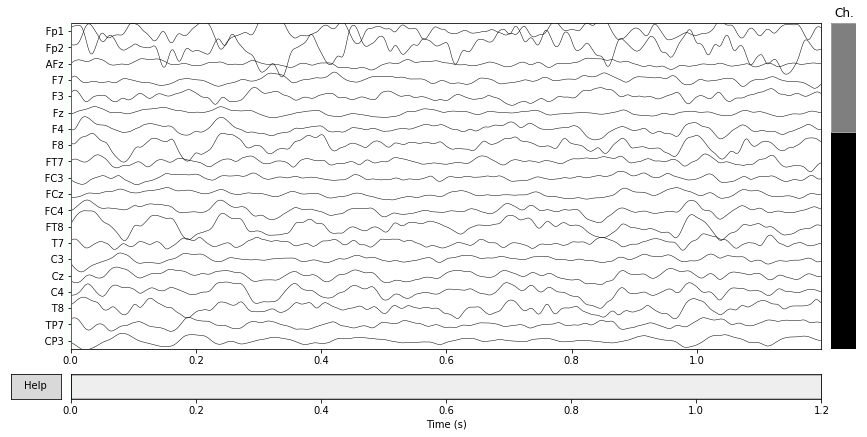

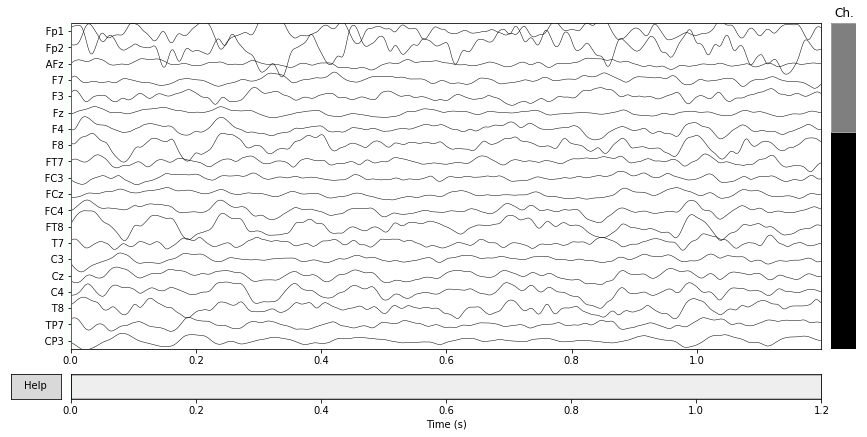

In [20]:
Sub1 = loadmat("../data/Subject_1.mat")

#Single trial rescaled 1e-6
sample = Sub1['X_EEG_TRAIN'][:,:,0]*1e-6

#EEG info
info = mne.create_info(list(eegLoc['Name']),1000,ch_types=["eeg"]*60)

rawEEG = mne.io.RawArray(sample,info)
rawEEG.set_montage(mne.channels.read_montage("standard_1020"))

rawEEG.plot()

# ICA

Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 3301 samples (3.301 sec) selected
filter_length (3301) is longer than the signal (1200), distortion is likely. Reduce filter length or filter a longer signal.
Fitting ICA to data using 60 channels (please be patient, this may take a while)
Inferring max_pca_components from picks


<ipython-input-4-095e6f33224c>:2: RuntimeWarning: filter_length (3301) is longer than the signal (1200), distortion is likely. Reduce filter length or filter a longer signal.
  rawEEG.filter(1, None)


Using all PCA components: 60
Fitting ICA took 0.4s.


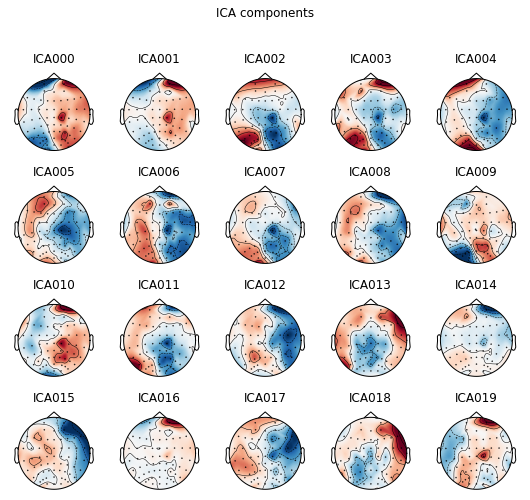

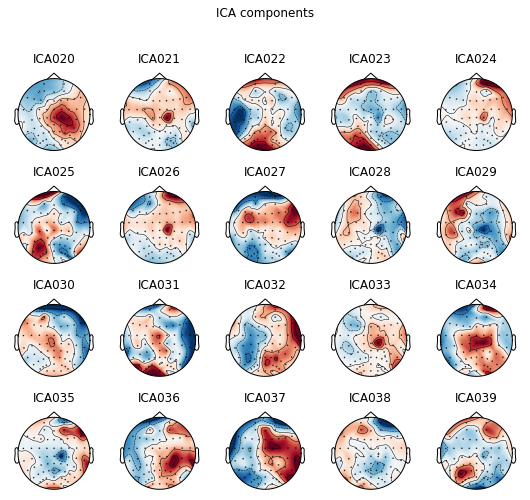

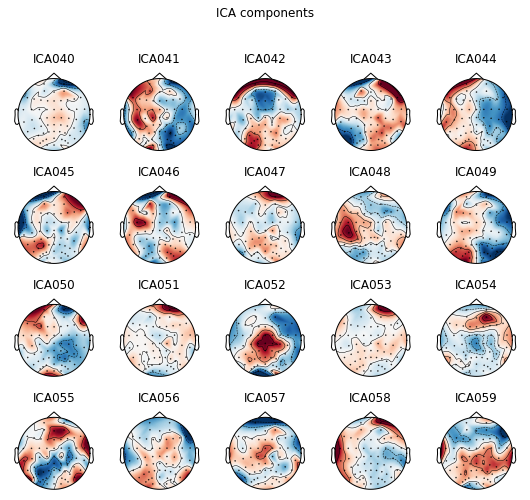

In [4]:
#Highpass filter, because ICA does not work with low frequency drifts
rawEEG.filter(1, None)

ica = mne.preprocessing.ICA(random_state=1)
ica.fit(rawEEG)

#Scalp plot of components
ica.plot_components(inst=rawEEG)


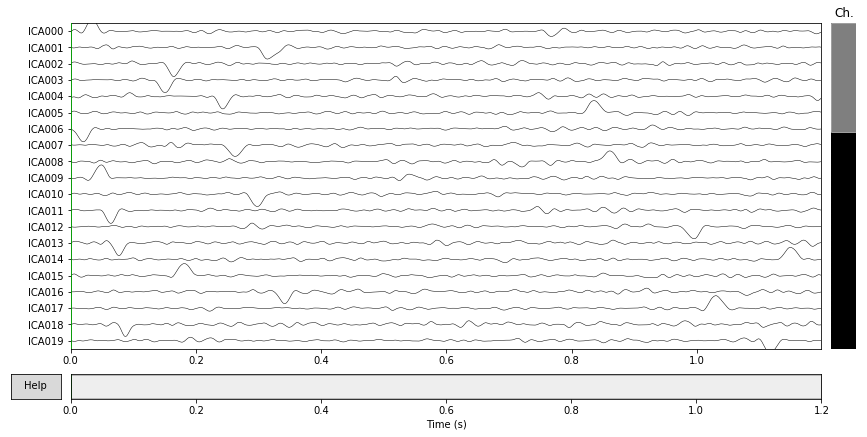

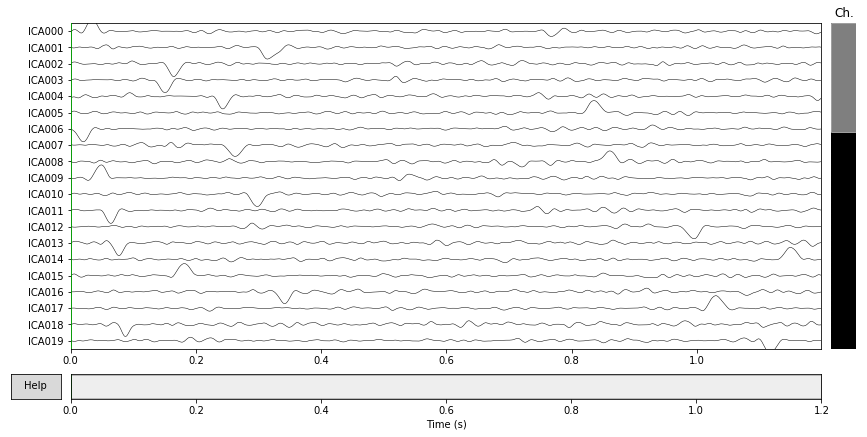

In [5]:
#Plot of the components
ica.plot_sources(inst=rawEEG)

# Remove components
By visual inspection we try to identify the components that do not correspond to the activity of discrimination between 
faces and cars

Transforming to ICA space (60 components)
Zeroing out 13 ICA components


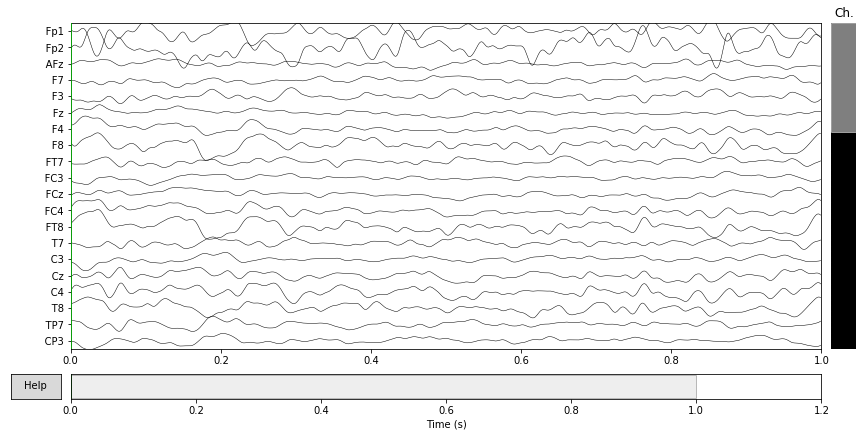

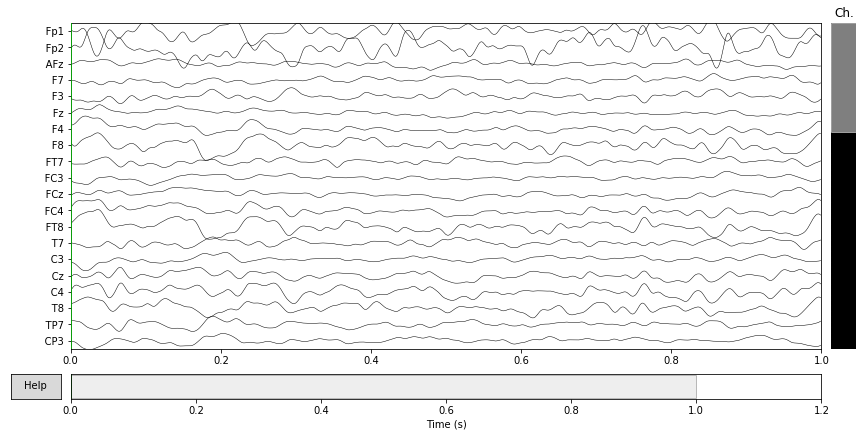

In [23]:
ica.exclude = [1,5,13,16,17,18,19,24,26,27,28,29,54]

newEEG = rawEEG.copy()
ica.apply(newEEG)

newEEG.plot(n_channels=20, start=0,duration=1)